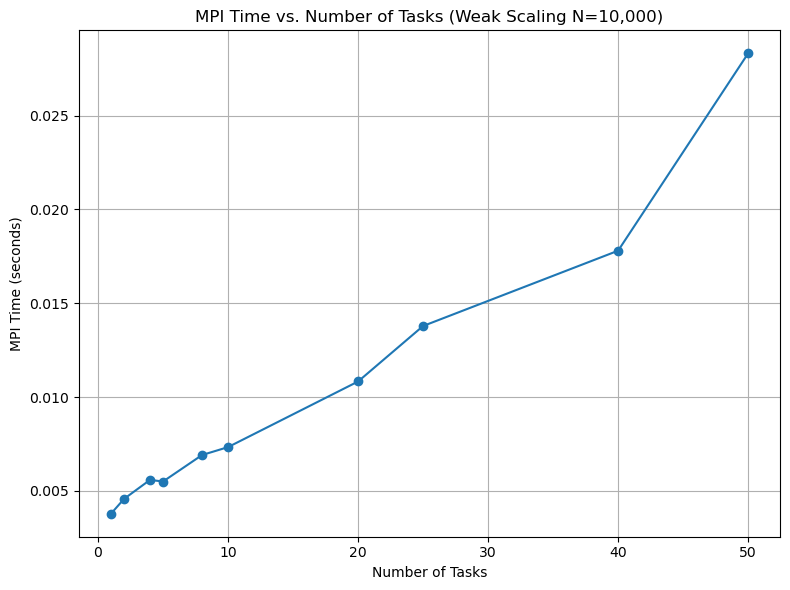

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV file
data = np.genfromtxt("weak.csv", delimiter=",", skip_header=1)

# Extract data into separate arrays
num_tasks = data[:, 0]
mpi_time = data[:, 1]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(num_tasks, mpi_time, marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Tasks")
plt.ylabel("MPI Time (seconds)")
plt.title("MPI Time vs. Number of Tasks (Weak Scaling N=10,000)")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




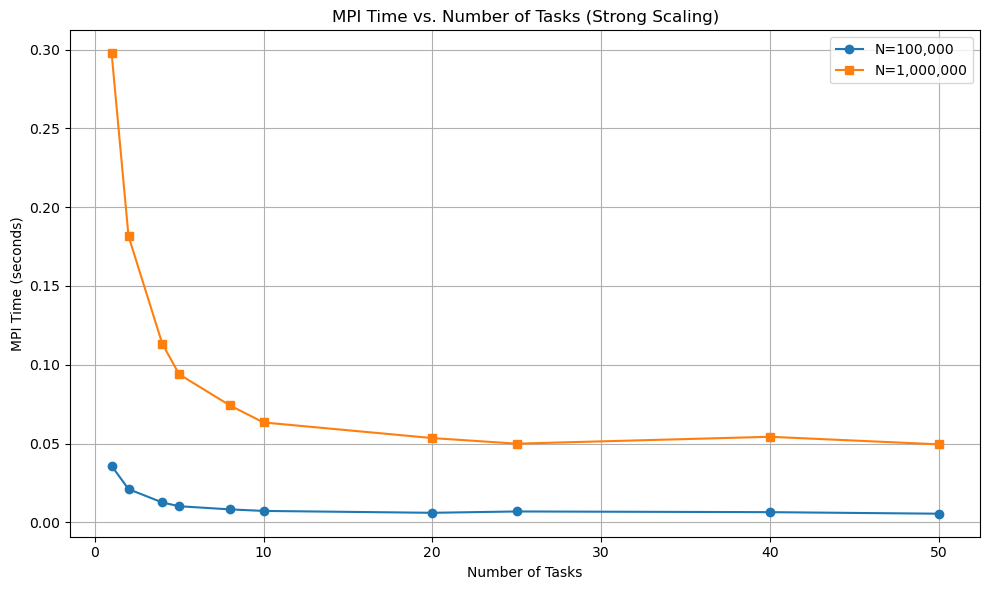

In [12]:


# Read data from CSV file
data = np.genfromtxt("strong.csv", delimiter=",", skip_header=1)

# Extract data into separate arrays
num_tasks = data[:, 0]
mpi_time_100000 = data[:, 1]
mpi_time_1000000 = data[:, 2]

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot MPI time for N=100000
plt.plot(num_tasks, mpi_time_100000, marker='o', linestyle='-', label='N=100,000')

# Plot MPI time for N=1000000
plt.plot(num_tasks, mpi_time_1000000, marker='s', linestyle='-', label='N=1,000,000')

# Add labels and title
plt.xlabel("Number of Tasks")
plt.ylabel("MPI Time (seconds)")
plt.title("MPI Time vs. Number of Tasks (Strong Scaling)")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


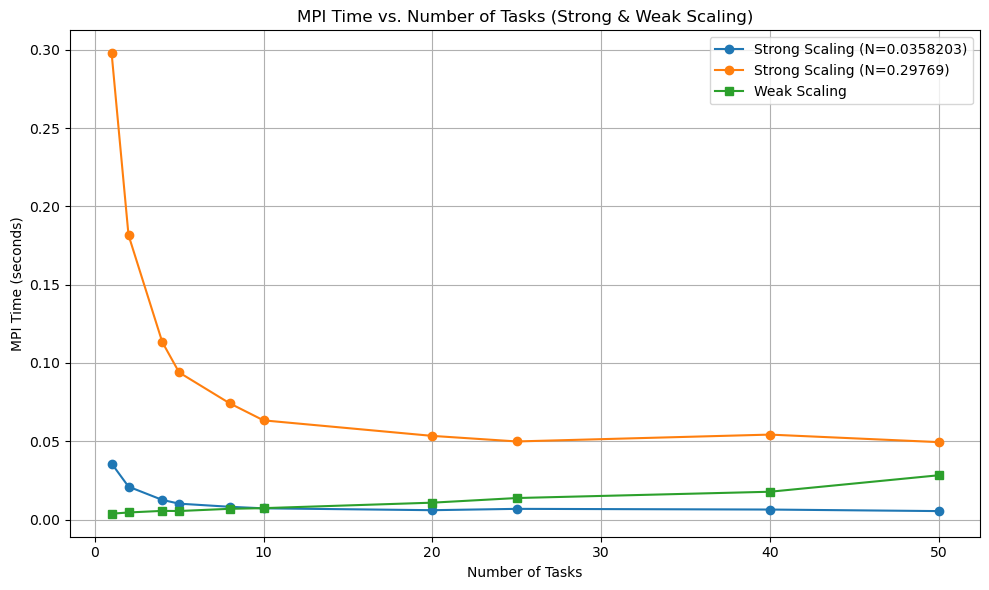

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read CSV data
def read_csv_data(filename):
  data = np.genfromtxt(filename, delimiter=",", skip_header=1)
  num_tasks = data[:, 0]
  return num_tasks, data[:, 1:]  # Return tasks and remaining columns

# Read data from strong.csv
strong_tasks, strong_times = read_csv_data("strong.csv")

# Read data from weak.csv
weak_tasks, weak_times = read_csv_data("weak.csv")

# Check if both datasets have the same number of tasks (optional)
if not np.array_equal(strong_tasks, weak_tasks):
  print("Warning: Number of tasks differ between strong.csv and weak.csv")

# Create separate lines for strong and weak scaling data (assuming multiple columns in strong.csv)
num_lines = strong_times.shape[1]  # Get the number of MPI time columns (e.g., N=100000, N=1000000)
line_labels = []
for i in range(num_lines):
  line_labels.append(f"Strong Scaling (N={strong_times[0, i]})")  # Assuming first row has N values

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot lines for strong scaling data
for i in range(num_lines):
  plt.plot(strong_tasks, strong_times[:, i], marker='o', linestyle='-', label=line_labels[i])

# Plot line for weak scaling data (assuming weak.csv has only one MPI time column)
plt.plot(weak_tasks, weak_times[:, 0], marker='s', linestyle='-', label='Weak Scaling')

# Add labels and title
plt.xlabel("Number of Tasks")
plt.ylabel("MPI Time (seconds)")
plt.title("MPI Time vs. Number of Tasks (Strong & Weak Scaling)")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


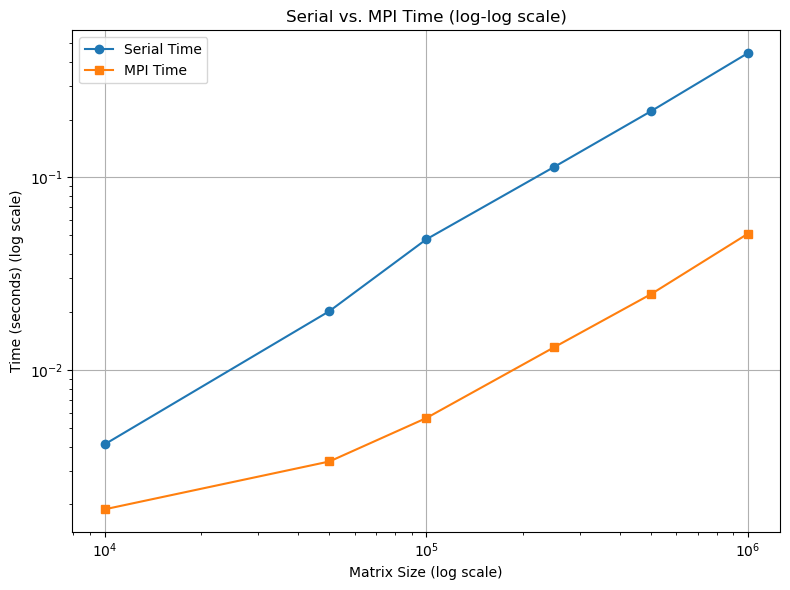

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV file
data = np.genfromtxt("serial_parallel.csv", delimiter=",", skip_header=1)

# Extract data into separate arrays
matrix_size = data[:, 0]
serial_time = data[:, 1]
mpi_time = data[:, 2]

# Create the log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(matrix_size, serial_time, marker='o', linestyle='-', label='Serial Time')
plt.loglog(matrix_size, mpi_time, marker='s', linestyle='-', label='MPI Time')

# Add labels and title with log scale indicators
plt.xlabel("Matrix Size (log scale)")
plt.ylabel("Time (seconds) (log scale)")
plt.title("Serial vs. MPI Time (log-log scale)")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
